In [1]:
%load_ext autoreload
%autoreload 2
import os
from utils import io
from utils import embedding

cnv_fn = '/Users/chenlingxi/Desktop/workspace/scSVAS/HXLC/result/LC008T/LC008T_cnv.csv'
meta_fn = '/Users/chenlingxi/Desktop/workspace/scSVAS/HXLC/result/LC008T/LC008T_meta_scvar.csv'
cnv_fn = 'demo_data/T10_cnv.csv'
meta_fn = 'T10_meta_scvar.csv'
cnv_fn = os.path.join('..', 'demo_data', 'demo_chr22_cnv.csv')
meta_fn = os.path.join('..', 'demo_data', 'demo_chr22_meta.csv')
cluster_label = 'cluster'

cnv_index_name = 'cell_id'
cnv_df = io.read_cnv_fn(cnv_fn, cnv_index_name)
meta_df = io.read_meta_fn(meta_fn, cnv_index_name)
cell_names = cnv_df.index.to_list()

phate_df = embedding.get_phate(cnv_df, cell_names, cnv_index_name)
tsne_df = embedding.get_tsne(cnv_df, cell_names, cnv_index_name)
umap_df = embedding.get_umap(cnv_df, cell_names, cnv_index_name)
pca_df = embedding.get_pca(cnv_df, cell_names, cnv_index_name)


C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\anndata\base.py:18: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


Calculating PHATE...
  Running PHATE on 100 observations and 70 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.01 seconds.
  Calculating optimal t...
    Automatically selected t = 6
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\graphtools\graphs.py:284: RuntimeWarning: Detected zero distance between samples 29 and 39. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,
C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\umap\umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "..\..\..\..\AppData\Local\Continuum\miniconda3\lib\site-packages\umap\umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
C:\Users\lingxchen2\AppData\Local\Continuum\miniconda3\lib\site-packages\numba\compiler.py:725: NumbaWarning: Function "fuzzy_simplicial

In [22]:
import sys
import os
import numpy as np
import torch
import DeepMF
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



data = cnv_df.to_numpy()
nrun = 1
device = 'cpu'
M, N = data.shape
K = 2

device = torch.device(device)
L = 3
n_batch = 10000

epoches = 5000
model = DeepMF.DeepMF(M, N, K=K, L=L,
                          learning_rate=1e-3,
                          epoches=epoches,
                          neighbor_proximity = 'Lap',
                          neighbor_k = 3,
                          device=device, problem='regression', data_type='impute')
model.fit(data, n_batch, delta=0.00001, alpha=0.01)


y_pred = model.predict(data)
U, V = model.save_U_V()
U_df = pd.DataFrame(U, columns=['e_DeepMF_U1', 'e_DeepMF_U2'], index=cell_names)




epoch=0	batch=0	17.310842514038086	16.311230392456054	0.053755391389131546	0.9458569288253784
epoch=1	batch=0	17.29697608947754	16.30283889770508	0.05207275599241257	0.942064106464386
epoch=2	batch=0	17.283174514770508	16.29446439743042	0.05042670667171478	0.9382835030555725
epoch=3	batch=0	17.269441604614258	16.286108779907227	0.048818331211805344	0.9345154166221619
epoch=4	batch=0	17.255779266357422	16.277770156860353	0.04724772274494171	0.930759608745575
epoch=5	batch=0	17.242183685302734	16.269452304840087	0.04571431130170822	0.9270159006118774
epoch=6	batch=0	17.228654861450195	16.261151447296143	0.04421773925423622	0.9232842326164246
epoch=7	batch=0	17.215194702148438	16.252873249053955	0.04275785759091377	0.9195641875267029
epoch=8	batch=0	17.201805114746094	16.24461582183838	0.041334494948387146	0.9158559441566467
epoch=9	batch=0	17.18848419189453	16.236377277374267	0.039947446435689926	0.9121586680412292
epoch=10	batch=0	17.17523193359375	16.22816328048706	0.03859657794237137	

epoch=87	batch=0	16.242164611816406	15.562076110839843	0.0016391393728554249	0.6784480810165405
epoch=88	batch=0	16.229150772094727	15.55127140045166	0.0015649062115699053	0.6763147115707397
epoch=89	batch=0	16.216079711914062	15.540386438369751	0.00149393395986408	0.6742003560066223
epoch=90	batch=0	16.20295524597168	15.529423112869262	0.0014261470641940832	0.672105073928833
epoch=91	batch=0	16.18977165222168	15.518381423950196	0.001361457514576614	0.6700286865234375
epoch=92	batch=0	16.17653465270996	15.507263259887695	0.0012997544836252928	0.6679715514183044
epoch=93	batch=0	16.16324234008789	15.49606767654419	0.001240922836586833	0.66593337059021
epoch=94	batch=0	16.14989471435547	15.484794673919678	0.0011848495341837406	0.6639143824577332
epoch=95	batch=0	16.13648796081543	15.473441419601441	0.0011314150178804994	0.6619145274162292
epoch=96	batch=0	16.123023986816406	15.462008857727051	0.0010804940247908235	0.6599336862564087
epoch=97	batch=0	16.109498977661133	15.450494155883788	

epoch=172	batch=0	14.704739570617676	14.139857482910156	0.0014634717954322696	0.5634188055992126
epoch=173	batch=0	14.677261352539062	14.112949562072753	0.0015171708073467016	0.5627950429916382
epoch=174	batch=0	14.649445533752441	14.085688533782958	0.001572121400386095	0.5621852278709412
epoch=175	batch=0	14.62128734588623	14.058069677352906	0.0016283156583085656	0.5615891814231873
epoch=176	batch=0	14.592781066894531	14.030088272094726	0.001685742987319827	0.5610066652297974
epoch=177	batch=0	14.563921928405762	14.00174054145813	0.0017443906981498003	0.5604375600814819
epoch=178	batch=0	14.534708023071289	13.973022708892822	0.0018042440060526133	0.5598816275596619
epoch=179	batch=0	14.505134582519531	13.943930053710938	0.001865288824774325	0.5593388080596924
epoch=180	batch=0	14.475194931030273	13.91445785522461	0.0019275149097666144	0.5588088631629944
epoch=181	batch=0	14.44488525390625	13.884602336883544	0.0019909075926989317	0.5582917928695679
epoch=182	batch=0	14.414202690124512	

epoch=257	batch=0	10.857413291931152	10.308033599853516	0.008585541509091854	0.540793776512146
epoch=258	batch=0	10.793808937072754	10.244530906677246	0.008661841042339802	0.5406164526939392
epoch=259	batch=0	10.729912757873535	10.180743083953857	0.008736557327210903	0.5404333472251892
epoch=260	batch=0	10.665733337402344	10.116680517196656	0.008809632621705532	0.5402438640594482
epoch=261	batch=0	10.60128402709961	10.052354536056518	0.008881009183824062	0.5400477647781372
epoch=262	batch=0	10.53657341003418	9.987777414321899	0.008950636722147465	0.5398447513580322
epoch=263	batch=0	10.471613883972168	9.92296142578125	0.009018467739224434	0.5396343469619751
epoch=264	batch=0	10.40641975402832	9.857918844223022	0.00908445194363594	0.5394162535667419
epoch=265	batch=0	10.341001510620117	9.792662887573242	0.009148557670414448	0.5391901731491089
epoch=266	batch=0	10.275372505187988	9.727205829620361	0.009210733696818352	0.5389555096626282
epoch=267	batch=0	10.20954418182373	9.6615608882904

epoch=344	batch=0	5.642264366149902	5.156301140785217	0.014156573452055454	0.47180670499801636
epoch=345	batch=0	5.599924087524414	5.1153416204452515	0.014309446327388287	0.4702731668949127
epoch=346	batch=0	5.558099746704102	5.074907984733581	0.014463447965681553	0.46872785687446594
epoch=347	batch=0	5.51678466796875	5.034995040893555	0.01461840234696865	0.46717119216918945
epoch=348	batch=0	5.475975513458252	4.995597596168518	0.014774132519960403	0.46560361981391907
epoch=349	batch=0	5.435666084289551	4.956710457801819	0.01493045873939991	0.46402549743652344
epoch=350	batch=0	5.395853042602539	4.9183284330368044	0.015087190084159374	0.46243730187416077
epoch=351	batch=0	5.3565287590026855	4.880444912910462	0.015244175679981709	0.4608393609523773
epoch=352	batch=0	5.317688941955566	4.843055176734924	0.015401224605739117	0.45923224091529846
epoch=353	batch=0	5.279326915740967	4.806152143478394	0.01555818971246481	0.4576164186000824
epoch=354	batch=0	5.2414374351501465	4.769730620384216

epoch=430	batch=0	3.342223882675171	2.984731614589691	0.021609514951705933	0.33588266372680664
epoch=431	batch=0	3.3263227939605713	2.9701569628715516	0.02160380408167839	0.3345620632171631
epoch=432	batch=0	3.31059193611145	2.9557454109191896	0.02159656211733818	0.3332499563694
epoch=433	batch=0	3.295030117034912	2.9414957785606384	0.02158789150416851	0.33194640278816223
epoch=434	batch=0	3.279634952545166	2.9274059414863585	0.02157779596745968	0.330651193857193
epoch=435	batch=0	3.264404773712158	2.9134740114212034	0.021566342562437057	0.3293644189834595
epoch=436	batch=0	3.249337911605835	2.8996985721588135	0.021553494036197662	0.3280860185623169
epoch=437	batch=0	3.234433174133301	2.8860779714584353	0.021539315581321716	0.3268159031867981
epoch=438	batch=0	3.2196884155273438	2.872610557079315	0.02152385376393795	0.3255540728569031
epoch=439	batch=0	3.2051022052764893	2.8592946767807006	0.021507104858756065	0.3243004083633423
epoch=440	batch=0	3.1906723976135254	2.846128442287445	0.

epoch=516	batch=0	2.447171688079834	2.1814317512512207	0.017724977806210518	0.248014897108078
epoch=517	batch=0	2.4408633708953857	2.1759758162498475	0.017655024304986	0.24723264575004578
epoch=518	batch=0	2.4346208572387695	2.170581486225128	0.017584748566150665	0.24645450711250305
epoch=519	batch=0	2.4284420013427734	2.165247344970703	0.017514163628220558	0.24568048119544983
epoch=520	batch=0	2.4223268032073975	2.1599729204177858	0.017443273216485977	0.2449105829000473
epoch=521	batch=0	2.4162745475769043	2.154757740497589	0.017372118309140205	0.24414464831352234
epoch=522	batch=0	2.4102840423583984	2.149600625038147	0.017300644889473915	0.2433827668428421
epoch=523	batch=0	2.40435528755188	2.1445013380050657	0.01722891256213188	0.24262486398220062
epoch=524	batch=0	2.398486614227295	2.1394589352607727	0.01715688966214657	0.24187088012695312
epoch=525	batch=0	2.3926782608032227	2.1344727087020874	0.017084598541259766	0.24112078547477722
epoch=526	batch=0	2.3869283199310303	2.12954171

epoch=601	batch=0	2.083040237426758	1.878358279466629	0.011298143304884434	0.1933838576078415
epoch=602	batch=0	2.0802605152130127	1.876181924343109	0.011223796755075455	0.19285474717617035
epoch=603	batch=0	2.077505588531494	1.8740283465385437	0.011149582453072071	0.19232770800590515
epoch=604	batch=0	2.074775457382202	1.8718971920013427	0.01107554417103529	0.1918027698993683
epoch=605	batch=0	2.0720696449279785	1.8697881066799165	0.011001691222190857	0.19127985835075378
epoch=606	batch=0	2.0693881511688232	1.8677010905742646	0.010928069241344929	0.19075904786586761
epoch=607	batch=0	2.066730499267578	1.8656357896327973	0.01085458043962717	0.19024024903774261
epoch=608	batch=0	2.0640969276428223	1.863592085838318	0.010781262069940567	0.1897234469652176
epoch=609	batch=0	2.0614864826202393	1.8615695071220397	0.010708214715123177	0.18920870125293732
epoch=610	batch=0	2.058899402618408	1.8595681715011596	0.010635294951498508	0.18869587779045105
epoch=611	batch=0	2.056335210800171	1.85758

epoch=686	batch=0	1.916164755821228	1.7555928969383239	0.005886751692742109	0.15468502044677734
epoch=687	batch=0	1.9148447513580322	1.7547148489952087	0.005836568772792816	0.15429338812828064
epoch=688	batch=0	1.9135361909866333	1.7538464784622192	0.00578669598326087	0.15390300750732422
epoch=689	batch=0	1.9122389554977417	1.7529877853393554	0.005737169645726681	0.15351389348506927
epoch=690	batch=0	1.9109524488449097	1.7521384155750275	0.005688037257641554	0.15312601625919342
epoch=691	batch=0	1.909677267074585	1.7512986052036286	0.0056392536498606205	0.15273937582969666
epoch=692	batch=0	1.9084128141403198	1.7504681181907653	0.0055907838977873325	0.1523539423942566
epoch=693	batch=0	1.9071590900421143	1.7496467185020446	0.005542623344808817	0.15196974575519562
epoch=694	batch=0	1.9059162139892578	1.7488346421718597	0.005494850687682629	0.15158672630786896
epoch=695	batch=0	1.9046838283538818	1.748031417131424	0.005447475705295801	0.15120495855808258
epoch=696	batch=0	1.9034620523452

epoch=770	batch=0	1.8363569974899292	1.7079009675979615	0.002821358386427164	0.12563462555408478
epoch=771	batch=0	1.8356974124908447	1.70756969332695	0.0027975377161055803	0.12533020973205566
epoch=772	batch=0	1.83504319190979	1.707242431640625	0.002774057909846306	0.1250266432762146
epoch=773	batch=0	1.8343937397003174	1.7069189465045929	0.0027507736813277006	0.12472394853830338
epoch=774	batch=0	1.8337492942810059	1.706599473953247	0.0027277262415736914	0.1244220957159996
epoch=775	batch=0	1.8331098556518555	1.7062837779521942	0.0027050054632127285	0.12412109225988388
epoch=776	batch=0	1.832475185394287	1.7059717404842376	0.002682490972802043	0.123820960521698
epoch=777	batch=0	1.8318452835083008	1.7056634795665742	0.0026602463331073523	0.12352164834737778
epoch=778	batch=0	1.8312203884124756	1.7053588771820067	0.002638272475451231	0.1232232004404068
epoch=779	batch=0	1.8306000232696533	1.7050579333305358	0.002616439014673233	0.12292557209730148
epoch=780	batch=0	1.829984188079834	1

epoch=854	batch=0	1.7945165634155273	1.6901791512966156	0.0015469492645934224	0.10279054194688797
epoch=855	batch=0	1.7941417694091797	1.690054407119751	0.0015385274309664965	0.10254877805709839
epoch=856	batch=0	1.7937690019607544	1.6899310791492461	0.0015302305109798908	0.10230763256549835
epoch=857	batch=0	1.7933982610702515	1.6898090493679045	0.00152208365034312	0.10206714272499084
epoch=858	batch=0	1.7930296659469604	1.6896883177757263	0.0015140268951654434	0.10182726383209229
epoch=859	batch=0	1.7926628589630127	1.6895687663555146	0.0015060530276969075	0.10158801823854446
epoch=860	batch=0	1.7922981977462769	1.689450513124466	0.0014982944121584296	0.10134942829608917
epoch=861	batch=0	1.7919355630874634	1.6893335580825806	0.0014904987765476108	0.10111148655414581
epoch=862	batch=0	1.7915749549865723	1.6892177832126618	0.0014829462161287665	0.1008741557598114
epoch=863	batch=0	1.7912161350250244	1.6891031885147094	0.0014754132134839892	0.10063747316598892
epoch=864	batch=0	1.79085

epoch=938	batch=0	1.7686140537261963	1.6829324233531953	0.0011348013067618012	0.08454678952693939
epoch=939	batch=0	1.7683571577072144	1.6828719985485077	0.001132354373112321	0.08435279875993729
epoch=940	batch=0	1.7681010961532593	1.6828119277954101	0.0011299026664346457	0.08415926992893219
epoch=941	batch=0	1.7678459882736206	1.6827522110939026	0.0011275379220023751	0.08396624028682709
epoch=942	batch=0	1.7675918340682983	1.682692848443985	0.0011252238182350993	0.08377372473478317
epoch=943	batch=0	1.767338514328003	1.6826338398456573	0.0011229362571612	0.08358172327280045
epoch=944	batch=0	1.7670860290527344	1.6825751852989197	0.0011206603376194835	0.08339016884565353
epoch=945	batch=0	1.7668343782424927	1.682516884803772	0.0011183185270056129	0.083199143409729
epoch=946	batch=0	1.766583800315857	1.6824589383602142	0.0011162267765030265	0.08300860226154327
epoch=947	batch=0	1.7663339376449585	1.6824012279510498	0.0011140619171783328	0.08281853795051575
epoch=948	batch=0	1.7660849094

epoch=1022	batch=0	1.7495841979980469	1.6786984384059906	0.0010181493125855923	0.06986760348081589
epoch=1023	batch=0	1.7493829727172852	1.6786542999744416	0.0010175051866099238	0.0697111189365387
epoch=1024	batch=0	1.749182105064392	1.6786101615428923	0.0010168302105739713	0.06955502182245255
epoch=1025	batch=0	1.7489815950393677	1.67856614112854	0.0010161303216591477	0.06939931213855743
epoch=1026	batch=0	1.748781681060791	1.6785222387313843	0.0010154556948691607	0.06924401223659515
epoch=1027	batch=0	1.748582363128662	1.678478454351425	0.0010148162255063653	0.06908909231424332
epoch=1028	batch=0	1.7483834028244019	1.678434669971466	0.0010141344973817468	0.06893457472324371
epoch=1029	batch=0	1.7481849193572998	1.6783908855915068	0.0010135751217603683	0.06878043711185455
epoch=1030	batch=0	1.7479867935180664	1.6783472192287445	0.0010128715075552464	0.06862672418355942
epoch=1031	batch=0	1.7477893829345703	1.6783036708831787	0.0010122709209099412	0.06847336888313293
epoch=1032	batch=0

epoch=1105	batch=0	1.734310507774353	1.6751906132698058	0.000983438570983708	0.058136336505413055
epoch=1106	batch=0	1.7341418266296387	1.6751493072509764	0.0009831320494413376	0.05800938978791237
epoch=1107	batch=0	1.733973741531372	1.675108001232147	0.0009829116752371192	0.05788280814886093
epoch=1108	batch=0	1.7338058948516846	1.6750666952133177	0.0009827251778915524	0.057756517082452774
epoch=1109	batch=0	1.7336384057998657	1.6750253891944884	0.0009824256412684917	0.057630542665719986
epoch=1110	batch=0	1.733471155166626	1.674984083175659	0.0009822144638746977	0.05750489979982376
epoch=1111	batch=0	1.7333043813705444	1.6749427771568297	0.0009819692932069302	0.05737955495715141
epoch=1112	batch=0	1.733137845993042	1.6749014711380004	0.0009817980462685227	0.05725453794002533
epoch=1113	batch=0	1.7329715490341187	1.674860165119171	0.000981524819508195	0.057129811495542526
epoch=1114	batch=0	1.732805609703064	1.6748188591003417	0.0009813080541789532	0.057005416601896286
epoch=1115	batc

epoch=1188	batch=0	1.7213371992111206	1.6717559587955475	0.0009693080210126936	0.0486118458211422
epoch=1189	batch=0	1.7211922407150269	1.6717142987251281	0.0009692614548839629	0.048508696258068085
epoch=1190	batch=0	1.7210475206375122	1.6716725206375123	0.0009690931183286011	0.04840580001473427
epoch=1191	batch=0	1.7209031581878662	1.6716309785842896	0.0009690213482826948	0.04830315336585045
epoch=1192	batch=0	1.7207589149475098	1.6715892004966735	0.0009688975987955928	0.048200760036706924
epoch=1193	batch=0	1.7206149101257324	1.6715475404262543	0.000968753476627171	0.048098623752593994
epoch=1194	batch=0	1.7204712629318237	1.6715057623386382	0.0009686955600045621	0.04799674078822136
epoch=1195	batch=0	1.7203277349472046	1.671464102268219	0.0009684856631793082	0.04789511486887932
epoch=1196	batch=0	1.720184564590454	1.671422324180603	0.0009684684919193387	0.04779374971985817
epoch=1197	batch=0	1.7200415134429932	1.6713805460929871	0.0009683368843980134	0.04769260808825493
epoch=1198	b

epoch=1271	batch=0	1.7100826501846313	1.6682576930522919	0.0009615651797503233	0.04086340218782425
epoch=1272	batch=0	1.7099559307098389	1.6682149708271026	0.0009615592425689101	0.040779393166303635
epoch=1273	batch=0	1.7098292112350464	1.6681722486019135	0.0009614198934286833	0.04069558158516884
epoch=1274	batch=0	1.709702968597412	1.6681295263767242	0.0009613967267796397	0.040612008422613144
epoch=1275	batch=0	1.7095768451690674	1.6680869221687318	0.0009613053989596665	0.04052861034870148
epoch=1276	batch=0	1.7094507217407227	1.6680440819263458	0.0009612563299015164	0.04044541344046593
epoch=1277	batch=0	1.7093249559402466	1.6680013597011567	0.0009611440473236144	0.040362440049648285
epoch=1278	batch=0	1.7091994285583496	1.6679586374759674	0.0009611199493519962	0.040279652923345566
epoch=1279	batch=0	1.7090739011764526	1.6679157972335816	0.0009610260021872818	0.04019707068800926
epoch=1280	batch=0	1.7089488506317139	1.6678730750083923	0.0009609354310669005	0.040114711970090866
epoch=

epoch=1353	batch=0	1.7002850770950317	1.6647134006023407	0.0009566183434799314	0.034615106880664825
epoch=1354	batch=0	1.7001725435256958	1.6646696162223815	0.0009566215449012816	0.034546345472335815
epoch=1355	batch=0	1.7000601291656494	1.6646258318424225	0.0009564859792590141	0.03447777032852173
epoch=1356	batch=0	1.6999478340148926	1.6645820474624633	0.0009564507636241615	0.03440936654806137
epoch=1357	batch=0	1.6998357772827148	1.6645382630825043	0.0009564422070980072	0.03434109687805176
epoch=1358	batch=0	1.6997238397598267	1.6644943606853484	0.0009563529165461659	0.03427303582429886
epoch=1359	batch=0	1.6996121406555176	1.6644505763053894	0.0009563241037540138	0.0342051200568676
epoch=1360	batch=0	1.699500322341919	1.6644066739082337	0.0009563174680806696	0.03413737565279007
epoch=1361	batch=0	1.6993889808654785	1.6643628895282745	0.0009562664199620485	0.03406979888677597
epoch=1362	batch=0	1.699277639389038	1.6643189871311188	0.000956203555688262	0.03400236740708351
epoch=1363	b

epoch=1435	batch=0	1.691528081893921	1.6610795331001282	0.0009531016694381833	0.02949545346200466
epoch=1436	batch=0	1.6914268732070923	1.661034686565399	0.000953159760683775	0.029439043253660202
epoch=1437	batch=0	1.6913256645202637	1.6609897220134735	0.0009530910756438971	0.029382774606347084
epoch=1438	batch=0	1.6912245750427246	1.6609448754787446	0.0009530397946946323	0.029326610267162323
epoch=1439	batch=0	1.6911237239837646	1.6609000289440154	0.0009530620300211012	0.029270609840750694
epoch=1440	batch=0	1.6910227537155151	1.6608550643920899	0.0009529844974167645	0.029214734211564064
epoch=1441	batch=0	1.6909220218658447	1.6608100998401643	0.0009529612143523991	0.02915898524224758
epoch=1442	batch=0	1.6908215284347534	1.6607652533054351	0.0009529017261229455	0.029103385284543037
epoch=1443	batch=0	1.6907211542129517	1.6607202887535095	0.000952854345086962	0.02904789336025715
epoch=1444	batch=0	1.6906206607818604	1.660675324201584	0.0009528825175948441	0.0289925429970026
epoch=1445

epoch=1517	batch=0	1.6835962533950806	1.6573584508895873	0.0009507085778750479	0.025287151336669922
epoch=1518	batch=0	1.6835038661956787	1.6573125422000885	0.0009506100905127823	0.025240689516067505
epoch=1519	batch=0	1.6834114789962769	1.657266515493393	0.0009506491478532553	0.025194330140948296
epoch=1520	batch=0	1.683319330215454	1.657220606803894	0.0009505889611318707	0.025148095563054085
epoch=1521	batch=0	1.6832271814346313	1.657174698114395	0.0009505705093033612	0.025101950392127037
epoch=1522	batch=0	1.6831352710723877	1.6571287894248963	0.0009504858171567321	0.025055931881070137
epoch=1523	batch=0	1.683043360710144	1.6570827627182008	0.0009505723719485104	0.025010015815496445
epoch=1524	batch=0	1.68295156955719	1.6570368540287017	0.0009504903573542833	0.024964192882180214
epoch=1525	batch=0	1.6828598976135254	1.6569908273220062	0.0009504672489129007	0.024918491020798683
epoch=1526	batch=0	1.6827682256698608	1.6569448006153107	0.0009504274930804968	0.02487288974225521
epoch=15

epoch=1599	batch=0	1.6763168573379517	1.6535535764694214	0.000948827713727951	0.021814441308379173
epoch=1600	batch=0	1.6762316226959229	1.6535067236423493	0.0009488475625403225	0.02177601121366024
epoch=1601	batch=0	1.676146388053894	1.653459870815277	0.0009487884235568345	0.021737685427069664
epoch=1602	batch=0	1.6760611534118652	1.6534128999710083	0.0009487607749179006	0.021699439734220505
epoch=1603	batch=0	1.675976037979126	1.6533659291267395	0.0009488029754720628	0.02166127599775791
epoch=1604	batch=0	1.6758910417556763	1.6533190762996672	0.0009487743373028934	0.021623196080327034
epoch=1605	batch=0	1.6758060455322266	1.6532721054553985	0.0009487340576015413	0.021585194393992424
epoch=1606	batch=0	1.6757211685180664	1.6532251346111297	0.0009487440111115575	0.02154729515314102
epoch=1607	batch=0	1.6756362915039062	1.6531780457496643	0.0009487383649684489	0.021509476006031036
epoch=1608	batch=0	1.6755515336990356	1.6531310749053956	0.0009486196795478463	0.02147175744175911
epoch=16

epoch=1681	batch=0	1.6695523262023926	1.6496691584587098	0.0009473591344431043	0.018935803323984146
epoch=1682	batch=0	1.6694726943969727	1.6496213614940642	0.000947425258345902	0.01890387572348118
epoch=1683	batch=0	1.6693928241729736	1.6495734465122223	0.0009473789832554758	0.01887200027704239
epoch=1684	batch=0	1.6693131923675537	1.649525649547577	0.0009473858517594635	0.018840203061699867
epoch=1685	batch=0	1.6692335605621338	1.6494777345657348	0.0009473982499912381	0.018808485940098763
epoch=1686	batch=0	1.6691539287567139	1.6494298195838928	0.000947345222812146	0.01877683401107788
epoch=1687	batch=0	1.6690744161605835	1.6493819046020508	0.0009473242680542171	0.01874525472521782
epoch=1688	batch=0	1.6689950227737427	1.6493339896202088	0.0009473543614149094	0.018713753670454025
epoch=1689	batch=0	1.6689156293869019	1.6492860746383666	0.000947249645832926	0.01868230663239956
epoch=1690	batch=0	1.6688364744186401	1.6492381596565246	0.0009472823585383594	0.018650930374860764
epoch=169

epoch=1763	batch=0	1.6631932258605957	1.6457092094421386	0.000946301210206002	0.016537679359316826
epoch=1764	batch=0	1.6631178855895996	1.64566046833992	0.0009462868911214173	0.016511032357811928
epoch=1765	batch=0	1.663042426109314	1.6456117272377013	0.0009462099988013506	0.01648440957069397
epoch=1766	batch=0	1.6629669666290283	1.6455628681182861	0.0009462450980208814	0.016457833349704742
epoch=1767	batch=0	1.6628917455673218	1.6455141270160676	0.0009463205933570862	0.01643134467303753
epoch=1768	batch=0	1.6628165245056152	1.6454653859138488	0.0009462700108997524	0.0164048932492733
epoch=1769	batch=0	1.6627411842346191	1.6454165267944336	0.0009461907320655882	0.016378505155444145
epoch=1770	batch=0	1.6626662015914917	1.6453677856922149	0.0009462132584303617	0.016352174803614616
epoch=1771	batch=0	1.6625910997390747	1.6453189265727997	0.0009461988229304552	0.016325900331139565
epoch=1772	batch=0	1.6625161170959473	1.6452701854705811	0.0009461995214223862	0.016299694776535034
epoch=17

epoch=1845	batch=0	1.6569428443908691	1.6414747524261475	0.0009504826157353818	0.014517651870846748
epoch=1846	batch=0	1.656843900680542	1.6413986313343047	0.0009505113703198731	0.014494746923446655
epoch=1847	batch=0	1.656742811203003	1.6413202679157257	0.0009506510104984045	0.014471931383013725
epoch=1848	batch=0	1.656638741493225	1.6412388360500336	0.00095079664606601	0.01444915495812893
epoch=1849	batch=0	1.6565324068069458	1.641155161857605	0.0009508482762612402	0.014426449313759804
epoch=1850	batch=0	1.6564239263534546	1.6410691273212432	0.0009509052033536136	0.014403792098164558
epoch=1851	batch=0	1.656314730644226	1.6409825026988982	0.0009509978699497879	0.01438117865473032
epoch=1852	batch=0	1.6562025547027588	1.6408928096294404	0.0009510162053629756	0.014358632266521454
epoch=1853	batch=0	1.6560897827148438	1.6408026444911956	0.0009510451927781105	0.014336145482957363
epoch=1854	batch=0	1.6559747457504272	1.6407100009918212	0.0009511009557172656	0.014313695020973682
epoch=185

epoch=1927	batch=0	1.6443521976470947	1.6305739760398865	0.0009507841896265745	0.012827422469854355
epoch=1928	batch=0	1.644156575202942	1.630396832227707	0.000950655376072973	0.012809115462005138
epoch=1929	batch=0	1.6439629793167114	1.6302216947078705	0.0009504304616712034	0.012790877372026443
epoch=1930	batch=0	1.6437726020812988	1.6300497436523438	0.0009502519387751818	0.01277267187833786
epoch=1931	batch=0	1.643577218055725	1.6298725998401642	0.000950121262576431	0.012754539959132671
epoch=1932	batch=0	1.643383264541626	1.6296968722343446	0.0009500027517788112	0.012736443430185318
epoch=1933	batch=0	1.6431879997253418	1.629519728422165	0.0009498828439973295	0.012718439102172852
epoch=1934	batch=0	1.6429898738861084	1.6293395161628723	0.0009497719584032893	0.012700468301773071
epoch=1935	batch=0	1.642791509628296	1.6291594219207763	0.0009495312697254121	0.012682566419243813
epoch=1936	batch=0	1.6425976753234863	1.6289836943149567	0.0009491844102740288	0.012664718553423882
epoch=193

epoch=2009	batch=0	1.627936601638794	1.61555109500885	0.0009279251098632812	0.011457528918981552
epoch=2010	batch=0	1.627742886543274	1.6153733611106873	0.0009275712654925883	0.011441946029663086
epoch=2011	batch=0	1.6275488138198853	1.6151953911781312	0.0009269944857805967	0.011426376178860664
epoch=2012	batch=0	1.627357006072998	1.6150195455551146	0.0009265932021662593	0.011410820297896862
epoch=2013	batch=0	1.6271637678146362	1.6148420476913452	0.0009263951797038317	0.011395292356610298
epoch=2014	batch=0	1.6269749402999878	1.6146687984466552	0.000926283304579556	0.011379791423678398
epoch=2015	batch=0	1.6267813444137573	1.6144910645484924	0.000925952335819602	0.011364290490746498
epoch=2016	batch=0	1.6265907287597656	1.6143163990974425	0.0009254707838408649	0.011348818428814411
epoch=2017	batch=0	1.6264009475708008	1.6141424417495727	0.0009251240990124643	0.01133335568010807
epoch=2018	batch=0	1.62621009349823	1.6139669501781464	0.0009251797455362976	0.011317920871078968
epoch=2019

epoch=2091	batch=0	1.6138503551483154	1.6026974880695344	0.0009171971469186246	0.010235665366053581
epoch=2092	batch=0	1.6137022972106934	1.6025635385513306	0.0009172663558274508	0.010221477597951889
epoch=2093	batch=0	1.61355459690094	1.6024298250675202	0.0009174031438305974	0.01020730845630169
epoch=2094	batch=0	1.6134082078933716	1.6022975277900695	0.0009175260202027857	0.010193179361522198
epoch=2095	batch=0	1.613261103630066	1.602164522409439	0.0009175132145173848	0.010179074481129646
epoch=2096	batch=0	1.6131160259246826	1.602033759355545	0.0009173216531053185	0.010164966806769371
epoch=2097	batch=0	1.6129710674285889	1.6019028782844544	0.0009173190337605774	0.010150893591344357
epoch=2098	batch=0	1.612825632095337	1.6017714071273803	0.0009172844584099948	0.010136834345757961
epoch=2099	batch=0	1.6126807928085327	1.6016405260562896	0.0009173615253530443	0.0101228142157197
epoch=2100	batch=0	1.6125385761260986	1.6015122413635254	0.0009175058803521097	0.010108787566423416
epoch=210

epoch=2173	batch=0	1.603348731994629	1.5932647275924683	0.0009291302994824946	0.009154893457889557
epoch=2174	batch=0	1.603238582611084	1.5931663012504578	0.0009293393814004958	0.009142897091805935
epoch=2175	batch=0	1.6031286716461182	1.5930681109428406	0.0009295908967033029	0.009130926802754402
epoch=2176	batch=0	1.6030193567276	1.5929705107212067	0.00092990294797346	0.009118998423218727
epoch=2177	batch=0	1.6029106378555298	1.592873146533966	0.0009302864200435579	0.009107092395424843
epoch=2178	batch=0	1.6028019189834595	1.5927761363983155	0.0009305003331974149	0.009095218032598495
epoch=2179	batch=0	1.6026934385299683	1.592679362297058	0.0009306754800491035	0.00908337440341711
epoch=2180	batch=0	1.6025866270065308	1.5925841224193573	0.000930888345465064	0.009071587584912777
epoch=2181	batch=0	1.6024781465530396	1.5924872303009032	0.0009311146568506956	0.00905979610979557
epoch=2182	batch=0	1.6023718118667603	1.5923925805091859	0.0009312215261161327	0.009048056788742542
epoch=2183	b

epoch=2255	batch=0	1.5954362154006958	1.5862075352668763	0.0009524841443635523	0.008276278153061867
epoch=2256	batch=0	1.5953518152236938	1.5861320042610167	0.0009528752416372299	0.00826686155050993
epoch=2257	batch=0	1.59526789188385	1.5860571813583373	0.0009532839758321643	0.008257460780441761
epoch=2258	batch=0	1.595184326171875	1.5859827125072479	0.0009535528370179236	0.008248092606663704
epoch=2259	batch=0	1.5951011180877686	1.5859084796905518	0.0009537747828289866	0.008238774724304676
epoch=2260	batch=0	1.595017433166504	1.5858340108394622	0.0009539350867271423	0.008229466155171394
epoch=2261	batch=0	1.594934344291687	1.5857600140571595	0.0009542026091367006	0.0082201873883605
epoch=2262	batch=0	1.5948525667190552	1.5856871974468232	0.0009544545318931341	0.008210941217839718
epoch=2263	batch=0	1.5947704315185547	1.5856136727333068	0.0009549584938213229	0.0082017220556736
epoch=2264	batch=0	1.594687581062317	1.585539675951004	0.0009553649579174817	0.008192538283765316
epoch=2265	b

epoch=2337	batch=0	1.5892881155014038	1.5807165491580963	0.0009752752375788987	0.007596193812787533
epoch=2338	batch=0	1.5892208814620972	1.5806562423706054	0.0009755990467965603	0.00758896442130208
epoch=2339	batch=0	1.58915376663208	1.580595817565918	0.000976187118794769	0.007581757847219706
epoch=2340	batch=0	1.589086890220642	1.5805352747440338	0.0009770105825737119	0.007574582472443581
epoch=2341	batch=0	1.5890201330184937	1.5804747319221497	0.000977975782006979	0.007567418739199638
epoch=2342	batch=0	1.5889533758163452	1.5804141891002654	0.0009789566975086927	0.0075602903962135315
epoch=2343	batch=0	1.5888868570327759	1.5803536462783814	0.000980067066848278	0.00755317835137248
epoch=2344	batch=0	1.588820457458496	1.5802933394908905	0.000981038436293602	0.00754609564319253
epoch=2345	batch=0	1.5887542963027954	1.5802331507205962	0.0009820910636335611	0.007539033889770508
epoch=2346	batch=0	1.5886881351470947	1.5801730799674987	0.0009830401977524161	0.007532008923590183
epoch=2347	

epoch=2419	batch=0	1.5836894512176514	1.5756261134147644	0.0009848240297287703	0.007078452035784721
epoch=2420	batch=0	1.5836082696914673	1.5755503463745117	0.0009848547633737326	0.00707314582541585
epoch=2421	batch=0	1.583526611328125	1.5754738712310792	0.0009848254267126322	0.007067872676998377
epoch=2422	batch=0	1.5834438800811768	1.5753964519500732	0.0009848206536844373	0.007062641903758049
epoch=2423	batch=0	1.5833604335784912	1.5753182065486908	0.000984760234132409	0.007057424169033766
epoch=2424	batch=0	1.5832760334014893	1.575239017009735	0.0009847574401646852	0.007052263244986534
epoch=2425	batch=0	1.58319091796875	1.5751590013504029	0.0009846993489190936	0.007047127932310104
epoch=2426	batch=0	1.5831046104431152	1.5750779235363006	0.0009846992325037718	0.007042019162327051
epoch=2427	batch=0	1.5830174684524536	1.5749959015846253	0.0009845915483310819	0.007036958821117878
epoch=2428	batch=0	1.5829293727874756	1.57491281747818	0.0009846071479842067	0.0070319343358278275
epoch=2

epoch=2501	batch=0	1.5734975337982178	1.5657771062850951	0.0009156765299849212	0.006804770790040493
epoch=2502	batch=0	1.5733528137207031	1.5656345415115356	0.0009145161020569503	0.00680368160828948
epoch=2503	batch=0	1.5732104778289795	1.5654943370819092	0.0009135202271863818	0.006802631076425314
epoch=2504	batch=0	1.5730680227279663	1.565354014635086	0.0009123986819759011	0.0068015772849321365
epoch=2505	batch=0	1.572924256324768	1.5652125120162963	0.0009112928528338671	0.006800530012696981
epoch=2506	batch=0	1.5727797746658325	1.5650700652599334	0.0009102412732318044	0.0067994967103004456
epoch=2507	batch=0	1.5726348161697388	1.5649270284175874	0.0009092048858292401	0.006798462942242622
epoch=2508	batch=0	1.5724890232086182	1.5647835195064546	0.0009080855525098741	0.006797416601330042
epoch=2509	batch=0	1.5723432302474976	1.5646397745609284	0.0009070468950085342	0.006796373054385185
epoch=2510	batch=0	1.5721969604492188	1.5644955575466155	0.000906053464859724	0.006795316934585571
ep

epoch=2583	batch=0	1.559398889541626	1.551746277809143	0.0009369123727083206	0.006715693976730108
epoch=2584	batch=0	1.559178113937378	1.5515251135826111	0.0009380443370901048	0.006714902818202972
epoch=2585	batch=0	1.5589550733566284	1.5513017070293427	0.0009391932981088758	0.006714120507240295
epoch=2586	batch=0	1.5587300062179565	1.5510761761665344	0.0009405143209733069	0.0067133475095033646
epoch=2587	batch=0	1.5585029125213623	1.5508484029769898	0.0009419091511517763	0.006712587550282478
epoch=2588	batch=0	1.5582735538482666	1.550618269443512	0.0009433476952835917	0.0067118629813194275
epoch=2589	batch=0	1.5580418109893799	1.550385775566101	0.0009448922937735915	0.006711112335324287
epoch=2590	batch=0	1.5578075647354126	1.5501506853103637	0.0009464396862313151	0.0067103891633450985
epoch=2591	batch=0	1.5575705766677856	1.5499127626419067	0.0009481069864705205	0.006709680892527103
epoch=2592	batch=0	1.5573303699493408	1.54967165350914	0.0009497117716819048	0.006708997301757336
epoc

epoch=2665	batch=0	1.4965040683746338	1.488382136821747	0.000971989007666707	0.007149925455451012
epoch=2666	batch=0	1.4947903156280518	1.4866464579105376	0.0009708325378596783	0.007173063699156046
epoch=2667	batch=0	1.493133544921875	1.4849696695804595	0.0009671894367784262	0.007196580059826374
epoch=2668	batch=0	1.4914942979812622	1.4833134162425994	0.0009604205843061209	0.00722048245370388
epoch=2669	batch=0	1.4898319244384766	1.481636037826538	0.0009511660318821669	0.007244735956192017
epoch=2670	batch=0	1.4881340265274048	1.47992467045784	0.0009400443523190916	0.00726930471137166
epoch=2671	batch=0	1.4863951206207275	1.4781729412078857	0.0009280744707211852	0.007294153794646263
epoch=2672	batch=0	1.484623670578003	1.4763882851600647	0.0009160260669887066	0.007319251541048288
epoch=2673	batch=0	1.4828308820724487	1.4745816779136658	0.000904628774151206	0.0073445504531264305
epoch=2674	batch=0	1.4810571670532227	1.4727925372123718	0.0008946813177317381	0.007369984406977892
epoch=267

epoch=2747	batch=0	1.3186235427856445	1.309502409696579	0.0010099865030497313	0.008111252449452877
epoch=2748	batch=0	1.3157480955123901	1.3066244423389435	0.0010151074966415763	0.008108600974082947
epoch=2749	batch=0	1.3128674030303955	1.3037418723106384	0.0010197218507528305	0.00810577254742384
epoch=2750	batch=0	1.3099937438964844	1.300866265296936	0.0010246316669508815	0.008102823048830032
epoch=2751	batch=0	1.3070648908615112	1.2979344820976257	0.0010306097101420164	0.008099776692688465
epoch=2752	batch=0	1.3041731119155884	1.2950389301776886	0.0010375429410487413	0.008096585981547832
epoch=2753	batch=0	1.301157832145691	1.2920208764076233	0.0010436222655698657	0.008093304932117462
epoch=2754	batch=0	1.2981977462768555	1.2890571105480193	0.0010507089318707585	0.008089928887784481
epoch=2755	batch=0	1.2951548099517822	1.2860097885131836	0.0010585864074528217	0.008086482994258404
epoch=2756	batch=0	1.292167067527771	1.2830169904232025	0.0010670287301763892	0.008082964457571507
epoch

epoch=2829	batch=0	1.0238337516784668	1.0154450976848601	0.0008352764416486025	0.007553406059741974
epoch=2830	batch=0	1.0209319591522217	1.012584478855133	0.000815671170130372	0.007531899493187666
epoch=2831	batch=0	1.0181673765182495	1.0098596978187562	0.0007982355891726911	0.007509441114962101
epoch=2832	batch=0	1.015446662902832	1.007177402973175	0.0007831542170606554	0.0074860695749521255
epoch=2833	batch=0	1.0127583742141724	1.0045261466503144	0.0007705093012191355	0.007461764849722385
epoch=2834	batch=0	1.0100258588790894	1.0018293356895447	0.0007598568336106837	0.007436559535562992
epoch=2835	batch=0	1.007278561592102	0.9991167104244232	0.0007513439632020891	0.007410482969135046
epoch=2836	batch=0	1.0044878721237183	0.9963597106933594	0.0007445966475643218	0.0073835826478898525
epoch=2837	batch=0	1.001775860786438	0.9936810743808746	0.0007388980593532324	0.00735588651150465
epoch=2838	batch=0	0.9992039799690247	0.9911425244808197	0.000733978406060487	0.007327480707317591
epoch=

epoch=2911	batch=0	0.8751412034034729	0.8692606776952744	0.0008389457943849266	0.0050415717996656895
epoch=2912	batch=0	0.8740407228469849	0.8681789320707322	0.0008424647967331111	0.005019307602196932
epoch=2913	batch=0	0.8729435801506042	0.867099900841713	0.0008463329868391156	0.004997353535145521
epoch=2914	batch=0	0.8718613386154175	0.8660360938310623	0.0008495412766933441	0.004975701682269573
epoch=2915	batch=0	0.870801568031311	0.8649952411651611	0.0008519566617906094	0.00495434645563364
epoch=2916	batch=0	0.869737982749939	0.863950788974762	0.0008538918918929994	0.004933284595608711
epoch=2917	batch=0	0.8686882853507996	0.8629195547103882	0.0008561652502976358	0.004912526346743107
epoch=2918	batch=0	0.8676478862762451	0.8618964636325837	0.0008593698148615658	0.004892047494649887
epoch=2919	batch=0	0.8666213750839233	0.8608864724636078	0.0008630622760392725	0.004871875047683716
epoch=2920	batch=0	0.8655979037284851	0.8598796677589416	0.0008662758627906442	0.004851978737860918
epoc

epoch=2993	batch=0	0.8116840124130249	0.8066359734535217	0.0010657438542693853	0.003982290159910917
epoch=2994	batch=0	0.8112112283706665	0.8061685663461685	0.0010675805388018489	0.003975110128521919
epoch=2995	batch=0	0.8107268810272217	0.8056890624761581	0.0010698289843276143	0.003967954311519861
epoch=2996	batch=0	0.8102372288703918	0.8052038937807083	0.0010725088650360703	0.003960807342082262
epoch=2997	batch=0	0.8097690939903259	0.8047398501634597	0.0010755440453067422	0.003953692968934774
epoch=2998	batch=0	0.8093039989471436	0.8042785209417344	0.0010787819046527147	0.003946660552173853
epoch=2999	batch=0	0.8088384866714478	0.8038163655996322	0.001082384493201971	0.003939719870686531
epoch=3000	batch=0	0.8083735704421997	0.8033546233177185	0.0010860854526981711	0.003932860214263201
epoch=3001	batch=0	0.8079155087471008	0.8028996670246125	0.0010897512547671795	0.003926123026758432
epoch=3002	batch=0	0.8074665665626526	0.8024535620212555	0.0010935355676338077	0.003919482231140137
e

epoch=3074	batch=0	0.7832975387573242	0.7784544110298157	0.0011738191824406385	0.0036692931316792965
epoch=3075	batch=0	0.7830554842948914	0.7782141870260239	0.0011739894980564713	0.0036672644782811403
epoch=3076	batch=0	0.7828161716461182	0.7779766774177551	0.001174215110950172	0.003665239317342639
epoch=3077	batch=0	0.7825793623924255	0.7777416461706161	0.001174464705400169	0.0036632486153393984
epoch=3078	batch=0	0.7823441028594971	0.7775079721212387	0.0011748550459742546	0.0036612926051020622
epoch=3079	batch=0	0.7821102142333984	0.7772753602266311	0.0011755120940506458	0.003659343346953392
epoch=3080	batch=0	0.7818788290023804	0.7770452266931533	0.0011761437635868788	0.003657408757135272
epoch=3081	batch=0	0.7816499471664429	0.7768174535036086	0.0011769674019888043	0.0036555114202201366
epoch=3082	batch=0	0.7814229726791382	0.7765916275978089	0.001177712343633175	0.0036536219995468855
epoch=3083	batch=0	0.7811979651451111	0.7763676899671554	0.0011784652015194297	0.0036517744883894

epoch=3156	batch=0	0.7692700624465942	0.7644976383447647	0.0012299137888476253	0.0035425357054919004
epoch=3157	batch=0	0.7691559791564941	0.7643844008445739	0.00123033847194165	0.003541262587532401
epoch=3158	batch=0	0.76904296875	0.7642721664905548	0.0012308248551562428	0.0035399922635406256
epoch=3159	batch=0	0.7689309120178223	0.7641609942913056	0.0012311843456700444	0.003538719844073057
epoch=3160	batch=0	0.7688198685646057	0.7640507662296295	0.001231629867106676	0.0035374390427023172
epoch=3161	batch=0	0.7687095999717712	0.7639414232969284	0.0012320427922531962	0.0035361587069928646
epoch=3162	batch=0	0.7686005234718323	0.7638330835103988	0.001232542796060443	0.003534894436597824
epoch=3163	batch=0	0.7684922814369202	0.7637258648872376	0.0012328134616836905	0.0035335926804691553
epoch=3164	batch=0	0.7683849334716797	0.7636195313930512	0.0012331065954640508	0.0035323144402354956
epoch=3165	batch=0	0.7682785987854004	0.7635143780708313	0.0012331365142017603	0.0035310410894453526
ep

epoch=3238	batch=0	0.7622442245483398	0.7575895017385482	0.0012165965745225549	0.003438097657635808
epoch=3239	batch=0	0.7621777653694153	0.7575238251686096	0.001217084238305688	0.003436865983530879
epoch=3240	batch=0	0.7621118426322937	0.7574585616588593	0.0012176071759313345	0.00343565596267581
epoch=3241	batch=0	0.762046217918396	0.7573935931921005	0.0012181808706372976	0.0034344408195465803
epoch=3242	batch=0	0.7619808912277222	0.7573289787769317	0.0012187242973595858	0.0034332096111029387
epoch=3243	batch=0	0.7619160413742065	0.7572647774219513	0.0012192397844046354	0.0034320135600864887
epoch=3244	batch=0	0.76185142993927	0.7572009301185608	0.0012196832103654742	0.0034308116883039474
epoch=3245	batch=0	0.7617871761322021	0.7571374958753586	0.0012200839119032025	0.003429606556892395
epoch=3246	batch=0	0.7617233395576477	0.7570744746923447	0.0012204425875097513	0.0034284081775695086
epoch=3247	batch=0	0.7616598010063171	0.7570117485523223	0.001220812788233161	0.003427219344303012
e

epoch=3319	batch=0	0.7577713131904602	0.7532091754674911	0.0012286334531381726	0.0033335061743855476
epoch=3320	batch=0	0.7577245235443115	0.7531636798381806	0.0012287191348150373	0.003332111518830061
epoch=3321	batch=0	0.7576779723167419	0.7531183612346649	0.0012288776924833655	0.0033306791447103024
epoch=3322	batch=0	0.7576314806938171	0.753073160648346	0.0012290474260225892	0.0033292612060904503
epoch=3323	batch=0	0.7575851678848267	0.7530281370878219	0.0012292021419852972	0.003327827900648117
epoch=3324	batch=0	0.7575388550758362	0.7529832315444946	0.0012292006285861135	0.0033264148514717817
epoch=3325	batch=0	0.7574927806854248	0.7529385030269623	0.0012292987667024136	0.003325000638142228
epoch=3326	batch=0	0.7574469447135925	0.7528939515352249	0.0012294118059799075	0.0033235647715628147
epoch=3327	batch=0	0.7574011087417603	0.7528494590520859	0.0012294950429350138	0.0033221461344510317
epoch=3328	batch=0	0.7573555111885071	0.7528052026033402	0.0012295553460717201	0.00332070235162

epoch=3401	batch=0	0.7542944550514221	0.749846629500389	0.001236456329934299	0.0032113685738295317
epoch=3402	batch=0	0.7542552947998047	0.7498089820146561	0.0012365068541839719	0.003209818620234728
epoch=3403	batch=0	0.754216194152832	0.7497713935375213	0.001236524898558855	0.00320827541872859
epoch=3404	batch=0	0.7541771531105042	0.749733864068985	0.0012365273432806134	0.0032067422289401293
epoch=3405	batch=0	0.7541381120681763	0.7496963936090469	0.001236540381796658	0.003205189947038889
epoch=3406	batch=0	0.7540991902351379	0.7496589231491089	0.0012365904403850436	0.0032036476768553257
epoch=3407	batch=0	0.7540601491928101	0.7496215116977691	0.0012365421280264854	0.0032021072693169117
epoch=3408	batch=0	0.7540213465690613	0.7495841592550277	0.0012366395676508546	0.0032005745451897383
epoch=3409	batch=0	0.7539825439453125	0.7495468658208847	0.0012366257142275572	0.0031990339048206806
epoch=3410	batch=0	0.7539438009262085	0.74950963139534	0.0012366770533844829	0.003197482554242015
epo

epoch=3482	batch=0	0.7512545585632324	0.7469258219003677	0.0012425942113623023	0.0030861394479870796
epoch=3483	batch=0	0.7512183785438538	0.7468911248445511	0.0012426782632246614	0.0030845862347632647
epoch=3484	batch=0	0.7511821985244751	0.7468563687801361	0.0012427581241354346	0.003083049086853862
epoch=3485	batch=0	0.7511460185050964	0.7468216717243195	0.0012428018962964416	0.003081496572121978
epoch=3486	batch=0	0.7511098980903625	0.7467869746685027	0.0012429050402715802	0.0030799652449786663
epoch=3487	batch=0	0.7510735988616943	0.7467522776126861	0.0012429265771061182	0.0030784131959080696
epoch=3488	batch=0	0.7510375380516052	0.7467176395654678	0.001243085484020412	0.003076845081523061
epoch=3489	batch=0	0.7510015368461609	0.7466830015182495	0.0012432023650035262	0.0030753256287425756
epoch=3490	batch=0	0.7509654760360718	0.7466485404968262	0.0012431660434231162	0.0030737812630832195
epoch=3491	batch=0	0.7509294152259827	0.7466140794754028	0.0012430890928953886	0.00307222572155

epoch=3564	batch=0	0.7483523488044739	0.7441427993774414	0.0012472751550376415	0.0029622477013617754
epoch=3565	batch=0	0.7483177185058594	0.7441096365451813	0.0012472870294004679	0.002960772952064872
epoch=3566	batch=0	0.7482830882072449	0.7440764737129212	0.001247353502549231	0.0029592716600745916
epoch=3567	batch=0	0.7482483983039856	0.744043310880661	0.0012473003007471561	0.002957802964374423
epoch=3568	batch=0	0.7482138872146606	0.7440102070569992	0.0012473294045776129	0.0029563296120613813
epoch=3569	batch=0	0.7481793165206909	0.7439771622419358	0.0012472819071263075	0.002954852534458041
epoch=3570	batch=0	0.7481446862220764	0.7439441174268723	0.0012472231173887849	0.002953376155346632
epoch=3571	batch=0	0.7481101751327515	0.7439110726118088	0.001247187377884984	0.002951889531686902
epoch=3572	batch=0	0.7480756640434265	0.7438780277967453	0.0012472212547436357	0.002950432011857629
epoch=3573	batch=0	0.7480411529541016	0.7438449239730834	0.0012472603702917695	0.002948947250843048


epoch=3645	batch=0	0.7455947995185852	0.7414974439144134	0.0012511441018432379	0.002846178598701954
epoch=3646	batch=0	0.7455613017082214	0.7414652252197266	0.001251289271749556	0.002844805596396327
epoch=3647	batch=0	0.7455278038978577	0.741433065533638	0.0012513023102656007	0.0028434365522116423
epoch=3648	batch=0	0.7454943656921387	0.7414009058475495	0.001251424546353519	0.0028420414309948683
epoch=3649	batch=0	0.745461106300354	0.7413689821958542	0.0012514007976278663	0.0028406712226569653
epoch=3650	batch=0	0.745427668094635	0.7413370585441589	0.00125133094843477	0.0028392919339239597
epoch=3651	batch=0	0.7453943490982056	0.741305193901062	0.0012512936955317855	0.0028378849383443594
epoch=3652	batch=0	0.7453609704971313	0.7412732112407684	0.0012512208195403218	0.0028365005273371935
epoch=3653	batch=0	0.7453276515007019	0.7412412285804748	0.0012513089459389448	0.002835116581991315
epoch=3654	batch=0	0.7452943325042725	0.7412092459201812	0.0012513491092249751	0.0028337424155324697
e

epoch=3727	batch=0	0.742898166179657	0.7389074975252151	0.001254700357094407	0.00273593096062541
epoch=3728	batch=0	0.7428657412528992	0.7388765180110931	0.0012545769568532705	0.0027346282731741667
epoch=3729	batch=0	0.7428334951400757	0.7388455384969711	0.0012546199141070247	0.002733347937464714
epoch=3730	batch=0	0.7428012490272522	0.7388145589828491	0.0012545899953693151	0.002732055028900504
epoch=3731	batch=0	0.7427689433097839	0.7387835204601287	0.0012546352809295058	0.0027307497803121805
epoch=3732	batch=0	0.74273681640625	0.7387525999546051	0.001254737377166748	0.00272944662719965
epoch=3733	batch=0	0.7427045106887817	0.7387216204404831	0.0012547500664368272	0.0027281357906758785
epoch=3734	batch=0	0.7426722645759583	0.7386906999349594	0.00125465402379632	0.0027268531266599894
epoch=3735	batch=0	0.7426400780677795	0.7386598384380341	0.0012546890648081899	0.0027255460154265165
epoch=3736	batch=0	0.7426079511642456	0.7386289769411087	0.0012547110673040152	0.002724246820434928
epoc

epoch=3809	batch=0	0.7402953505516052	0.7364048248529435	0.0012575609143823385	0.002632975112646818
epoch=3810	batch=0	0.7402642965316772	0.7363750255107879	0.0012575137661769986	0.0026317588053643703
epoch=3811	batch=0	0.7402332425117493	0.7363451671600342	0.001257548457942903	0.002630546223372221
epoch=3812	batch=0	0.7402020692825317	0.7363152498006821	0.0012574895517900586	0.002629307098686695
epoch=3813	batch=0	0.740170955657959	0.73628533244133	0.0012575257569551468	0.002628093818202615
epoch=3814	batch=0	0.7401397824287415	0.7362554150819779	0.001257511554285884	0.0026268900837749243
epoch=3815	batch=0	0.7401087284088135	0.7362254977226257	0.0012575938599184155	0.0026256658602505922
epoch=3816	batch=0	0.7400776147842407	0.7361955213546753	0.001257625175639987	0.002624458633363247
epoch=3817	batch=0	0.740046501159668	0.7361655449867248	0.0012577235465869308	0.0026232521049678326
epoch=3818	batch=0	0.7400156855583191	0.7361357456445694	0.0012578432215377688	0.0026220406871289015
ep

epoch=3890	batch=0	0.737818717956543	0.734020169377327	0.001260364311747253	0.002538156695663929
epoch=3891	batch=0	0.7377886772155762	0.7339913141727448	0.0012603744398802519	0.0025370039511471987
epoch=3892	batch=0	0.7377587556838989	0.7339625179767608	0.001260385732166469	0.0025358551647514105
epoch=3893	batch=0	0.7377287149429321	0.7339336627721786	0.0012603332288563251	0.002534711267799139
epoch=3894	batch=0	0.7376988530158997	0.733904925584793	0.0012603005161508918	0.0025335773825645447
epoch=3895	batch=0	0.7376689314842224	0.7338761293888092	0.0012603329960256815	0.002532466547563672
epoch=3896	batch=0	0.7376389503479004	0.733847274184227	0.001260336022824049	0.0025313307996839285
epoch=3897	batch=0	0.7376090288162231	0.7338184189796447	0.0012604428920894861	0.0025302013382315636
epoch=3898	batch=0	0.7375792264938354	0.7337895637750625	0.0012605645461007953	0.0025290988851338625
epoch=3899	batch=0	0.7375493049621582	0.7337607675790787	0.0012605354422703385	0.0025279761757701635


epoch=3972	batch=0	0.7354096174240112	0.7316972368955612	0.00126355211250484	0.0024488188792020082
epoch=3973	batch=0	0.7353808283805847	0.731669443845749	0.001263650949113071	0.002447760198265314
epoch=3974	batch=0	0.735352098941803	0.7316416507959366	0.0012637522304430604	0.002446714323014021
epoch=3975	batch=0	0.735323429107666	0.7316139167547225	0.0012638586340472102	0.002445658901706338
epoch=3976	batch=0	0.7352946996688843	0.731586241722107	0.001263803569599986	0.002444606740027666
epoch=3977	batch=0	0.7352660298347473	0.7315588027238846	0.001263691927306354	0.0024435429368168116
epoch=3978	batch=0	0.7352373600006104	0.7315313047170638	0.0012635181192308664	0.0024424921721220016
epoch=3979	batch=0	0.7352086305618286	0.7315038067102432	0.0012634398881345987	0.0024414353538304567
epoch=3980	batch=0	0.7351800799369812	0.7314762496948242	0.0012634587474167347	0.002440378302708268
epoch=3981	batch=0	0.735151469707489	0.7314486926794052	0.0012634295271709561	0.0024393496569246054
epoch

epoch=4054	batch=0	0.7331022024154663	0.7294702523946762	0.0012662149965763092	0.0023657262790948153
epoch=4055	batch=0	0.7330747246742249	0.7294438165426255	0.001266151899471879	0.0023647532798349857
epoch=4056	batch=0	0.7330472469329834	0.7294174396991729	0.001266008010134101	0.0023637700360268354
epoch=4057	batch=0	0.7330197095870972	0.7293909448385238	0.0012659418862313032	0.00236281449906528
epoch=4058	batch=0	0.7329922318458557	0.7293645089864731	0.0012658954365178943	0.0023618354462087154
epoch=4059	batch=0	0.7329649329185486	0.7293380731344223	0.0012659522471949458	0.0023608605843037367
epoch=4060	batch=0	0.7329374551773071	0.7293116962909698	0.0012658810010179877	0.002359893871471286
epoch=4061	batch=0	0.7329099774360657	0.7292853194475174	0.0012657673796638846	0.0023589134216308594
epoch=4062	batch=0	0.7328826785087585	0.7292590606212616	0.0012656445614993572	0.002357951831072569
epoch=4063	batch=0	0.7328552603721619	0.7292326247692108	0.0012656515464186668	0.0023569809272885

epoch=4135	batch=0	0.7309247851371765	0.727366418838501	0.001268708030693233	0.0022896199952811003
epoch=4136	batch=0	0.7308985590934753	0.727341222167015	0.0012685933616012335	0.0022887075319886208
epoch=4137	batch=0	0.730872392654419	0.7273159074783325	0.001268712105229497	0.0022878034505993128
epoch=4138	batch=0	0.7308462262153625	0.7272906517982483	0.0012686778791248798	0.0022869184613227844
epoch=4139	batch=0	0.7308200001716614	0.7272652781009674	0.0012687052367255092	0.0022859976161271334
epoch=4140	batch=0	0.730793833732605	0.7272399634122848	0.001268795458599925	0.0022851000539958477
epoch=4141	batch=0	0.7307676076889038	0.727214589715004	0.0012688174610957503	0.0022842041216790676
epoch=4142	batch=0	0.7307414412498474	0.7271892160177231	0.0012689094291999936	0.002283314010128379
epoch=4143	batch=0	0.7307154536247253	0.7271640193462372	0.0012689951108768582	0.002282426692545414
epoch=4144	batch=0	0.7306893467903137	0.7271387636661529	0.0012690930161625147	0.0022815107367932796


epoch=4216	batch=0	0.7288506031036377	0.7253605395555496	0.0012709531001746655	0.0022190927993506193
epoch=4217	batch=0	0.7288257479667664	0.7253363460302353	0.001271069049835205	0.0022182827815413475
epoch=4218	batch=0	0.728800892829895	0.7253123885393142	0.0012710281880572438	0.0022174352779984474
epoch=4219	batch=0	0.7287757992744446	0.7252881360054017	0.0012710430892184377	0.0022165910340845585
epoch=4220	batch=0	0.7287508845329285	0.725264060497284	0.0012710302835330367	0.0022157803177833557
epoch=4221	batch=0	0.7287259697914124	0.7252398669719696	0.0012711548479273915	0.002214950742200017
epoch=4222	batch=0	0.7287009954452515	0.7252156734466553	0.0012712042080238461	0.0022141269873827696
epoch=4223	batch=0	0.7286760807037354	0.7251915389299393	0.0012712427414953709	0.002213278552517295
epoch=4224	batch=0	0.7286512851715088	0.7251674044132232	0.0012714160839095712	0.0022124466486275196
epoch=4225	batch=0	0.7286264300346375	0.7251434469223023	0.001271393964998424	0.0022116200998425

epoch=4298	batch=0	0.726856529712677	0.7234298372268677	0.0012734931660816073	0.002153160283342004
epoch=4299	batch=0	0.7268328070640564	0.7234068238735198	0.001273563364520669	0.002152390778064728
epoch=4300	batch=0	0.7268092036247253	0.7233839285373688	0.001273637404665351	0.002151623135432601
epoch=4301	batch=0	0.7267856001853943	0.7233610332012177	0.0012737142387777567	0.0021508419886231422
epoch=4302	batch=0	0.7267619371414185	0.7233380788564682	0.0012737629003822803	0.0021501006558537483
epoch=4303	batch=0	0.7267383337020874	0.723315360546112	0.0012736504431813955	0.002149309031665325
epoch=4304	batch=0	0.7267149090766907	0.7232927012443543	0.0012736381031572819	0.0021485479082912207
epoch=4305	batch=0	0.7266914248466492	0.7232699829339981	0.0012736639473587275	0.0021477877162396908
epoch=4306	batch=0	0.7266678214073181	0.7232471466064453	0.0012736354256048799	0.0021470272913575172
epoch=4307	batch=0	0.7266443967819214	0.7232243102788926	0.0012737591750919819	0.002146274782717228

epoch=4379	batch=0	0.7249920964241028	0.7216231709718705	0.0012758198427036405	0.002093089045956731
epoch=4380	batch=0	0.724969744682312	0.7216013377904892	0.001276001101359725	0.0020923824049532413
epoch=4381	batch=0	0.7249473333358765	0.7215797406435013	0.0012759598903357983	0.0020916706416755915
epoch=4382	batch=0	0.7249250411987305	0.72155790746212	0.0012761307880282402	0.002090978669002652
epoch=4383	batch=0	0.7249026894569397	0.7215362513065338	0.0012761325342580676	0.002090265043079853
epoch=4384	batch=0	0.7248802781105042	0.7215145951509475	0.0012761737452819943	0.00208953651599586
epoch=4385	batch=0	0.7248581051826477	0.7214931160211563	0.0012761662947013974	0.002088828245177865
epoch=4386	batch=0	0.7248359322547913	0.7214716368913651	0.0012761106481775641	0.0020881316158920527
epoch=4387	batch=0	0.72481369972229	0.7214500397443772	0.0012762144906446338	0.002087430562824011
epoch=4388	batch=0	0.724791407585144	0.7214285016059876	0.0012761689722537994	0.002086702035740018
epoch

epoch=4461	batch=0	0.7232113480567932	0.7198960483074188	0.0012781802797690034	0.0020371132995933294
epoch=4462	batch=0	0.7231902480125427	0.7198755723237992	0.0012782433768734336	0.0020364560186862946
epoch=4463	batch=0	0.723169207572937	0.7198550373315811	0.0012783559504896402	0.0020357994362711906
epoch=4464	batch=0	0.7231480479240417	0.7198345023393631	0.0012783820275217295	0.002035156823694706
epoch=4465	batch=0	0.7231272459030151	0.7198142623901367	0.0012784911086782813	0.002034513745456934
epoch=4466	batch=0	0.723106324672699	0.7197939044237137	0.0012785724829882383	0.002033864613622427
epoch=4467	batch=0	0.7230851054191589	0.7197733694314956	0.0012785341823473573	0.0020332084968686104
epoch=4468	batch=0	0.7230642437934875	0.7197532474994659	0.00127838843036443	0.002032563788816333
epoch=4469	batch=0	0.7230434417724609	0.7197331255674362	0.0012783913407474756	0.0020319060422480106
epoch=4470	batch=0	0.7230226397514343	0.7197129446268081	0.0012783814454451203	0.002031261334195733

epoch=4543	batch=0	0.7215374112129211	0.7182710105180741	0.001280660042539239	0.00198572501540184
epoch=4544	batch=0	0.7215175628662109	0.7182518327236176	0.001280586700886488	0.0019851282704621553
epoch=4545	batch=0	0.7214979529380798	0.7182327729463577	0.001280641183257103	0.001984551316127181
epoch=4546	batch=0	0.7214781641960144	0.7182135951519012	0.0012806172017008066	0.0019839326851069927
epoch=4547	batch=0	0.7214584350585938	0.718194476366043	0.0012806090526282787	0.001983329188078642
epoch=4548	batch=0	0.7214386463165283	0.7181752985715866	0.0012806302402168512	0.001982736401259899
epoch=4549	batch=0	0.721419095993042	0.7181561207771301	0.0012808351311832666	0.0019821510650217533
epoch=4550	batch=0	0.7213993668556213	0.7181369429826736	0.0012808613246306777	0.001981530338525772
epoch=4551	batch=0	0.7213796377182007	0.7181178241968155	0.001280884724110365	0.001980941044166684
epoch=4552	batch=0	0.7213600277900696	0.7180989414453507	0.0012807735474780202	0.0019803415052592754
epo

epoch=4624	batch=0	0.719987690448761	0.716765878200531	0.0012826600577682257	0.001939174602739513
epoch=4625	batch=0	0.7199692726135254	0.7167479985952377	0.0012826696038246155	0.0019386279163882136
epoch=4626	batch=0	0.719950795173645	0.7167300009727477	0.0012827105820178986	0.0019380771555006504
epoch=4627	batch=0	0.7199323177337646	0.7167120623588562	0.001282758777961135	0.001937521155923605
epoch=4628	batch=0	0.7199138402938843	0.716694005727768	0.001282860292121768	0.0019369679503142834
epoch=4629	batch=0	0.7198953628540039	0.7166760671138763	0.0012828665785491467	0.0019364177715033293
epoch=4630	batch=0	0.7198768854141235	0.7166581284999848	0.0012829146580770612	0.001935861655510962
epoch=4631	batch=0	0.7198584675788879	0.7166402488946915	0.001282929559238255	0.0019353210227563977
epoch=4632	batch=0	0.7198401689529419	0.7166224282979965	0.001282963901758194	0.0019347777124494314
epoch=4633	batch=0	0.7198218107223511	0.7166046077013015	0.0012829715851694345	0.0019342274172231555
e

epoch=4705	batch=0	0.718539834022522	0.7153585231304168	0.0012847341131418943	0.0018965192139148712
epoch=4706	batch=0	0.7185224890708923	0.7153419417142868	0.001284562749788165	0.00189600617159158
epoch=4707	batch=0	0.7185052633285522	0.7153250062465668	0.0012847509933635592	0.0018955112900584936
epoch=4708	batch=0	0.7184879779815674	0.7153083068132401	0.0012846642639487982	0.0018950164085254073
epoch=4709	batch=0	0.7184708714485168	0.7152914303541184	0.0012849217746406794	0.0018945221090689301
epoch=4710	batch=0	0.7184536457061768	0.7152749079465867	0.0012847015168517828	0.0018940174486488104
epoch=4711	batch=0	0.7184364795684814	0.7152580904960633	0.0012848608894273639	0.0018935028929263353
epoch=4712	batch=0	0.7184193730354309	0.7152417451143265	0.001284635392948985	0.001893027569167316
epoch=4713	batch=0	0.7184023261070251	0.7152249866724014	0.0012848321348428726	0.0018925186013802886
epoch=4714	batch=0	0.7183852195739746	0.7152084642648697	0.0012846995377913117	0.0018920281436294

epoch=4786	batch=0	0.7171916365623474	0.7140474110841751	0.0012866896577179432	0.0018575257854536176
epoch=4787	batch=0	0.7171754837036133	0.7140317738056183	0.0012866408796980977	0.0018570692045614123
epoch=4788	batch=0	0.7171593904495239	0.7140161365270614	0.0012866350589320064	0.00185660389252007
epoch=4789	batch=0	0.7171434760093689	0.7140006762742996	0.0012866136385127902	0.0018561488250270486
epoch=4790	batch=0	0.7171275019645691	0.7139851570129394	0.0012866707984358072	0.001855701208114624
epoch=4791	batch=0	0.7171114683151245	0.713969578742981	0.0012866199249401689	0.001855230424553156
epoch=4792	batch=0	0.7170954942703247	0.7139540004730225	0.001286685699597001	0.0018548010848462582
epoch=4793	batch=0	0.7170795798301697	0.7139384222030639	0.00128680351190269	0.0018543448532000184
epoch=4794	batch=0	0.7170637249946594	0.7139229619503021	0.0012868591584265232	0.0018538770964369178
epoch=4795	batch=0	0.7170477509498596	0.7139074426889419	0.0012868657940998673	0.001853440073318779

epoch=4867	batch=0	0.715940535068512	0.7128303587436676	0.001288197934627533	0.00182196288369596
epoch=4868	batch=0	0.7159256339073181	0.7128159016370773	0.0012882299488410354	0.0018215164309367537
epoch=4869	batch=0	0.715910792350769	0.7128013855218888	0.0012883237795904279	0.0018210919806733727
epoch=4870	batch=0	0.7158958911895752	0.7127868694067001	0.0012883612653240561	0.0018206852255389094
epoch=4871	batch=0	0.7158812880516052	0.7127725303173065	0.0012884543975815177	0.0018202569335699081
epoch=4872	batch=0	0.7158663272857666	0.7127580732107163	0.0012884432217106223	0.0018198429606854916
epoch=4873	batch=0	0.7158516049385071	0.7127437341213226	0.0012884038733318448	0.0018194299191236496
epoch=4874	batch=0	0.7158368229866028	0.712729395031929	0.0012883999152109027	0.0018190066330134869
epoch=4875	batch=0	0.715822160243988	0.7127151149511337	0.0012884022435173392	0.0018185873050242662
epoch=4876	batch=0	0.7158073782920837	0.7127007168531417	0.0012884248280897737	0.00181819999124854

epoch=4948	batch=0	0.7147838473320007	0.7117043566703797	0.0012899774592369795	0.0017894910415634513
epoch=4949	batch=0	0.7147700190544128	0.711691079735756	0.0012898409040644765	0.0017891100142151117
epoch=4950	batch=0	0.7147564888000488	0.7116779208183288	0.0012898497516289353	0.0017887268913909793
epoch=4951	batch=0	0.7147428393363953	0.7116646438837051	0.0012898013228550553	0.0017883434193208814
epoch=4952	batch=0	0.7147291898727417	0.7116513669490814	0.0012898420682176948	0.0017879527295008302
epoch=4953	batch=0	0.7147155404090881	0.7116380310058593	0.001289915293455124	0.0017875725170597434
epoch=4954	batch=0	0.714701771736145	0.7116246950626374	0.0012899142457172275	0.001787195447832346
epoch=4955	batch=0	0.7146880626678467	0.711611300110817	0.0012899084249511361	0.001786828157491982
epoch=4956	batch=0	0.7146746516227722	0.7115981411933899	0.0012900624424219131	0.0017864371184259653
epoch=4957	batch=0	0.7146609425544739	0.7115848642587662	0.0012900677975267172	0.0017860366497188

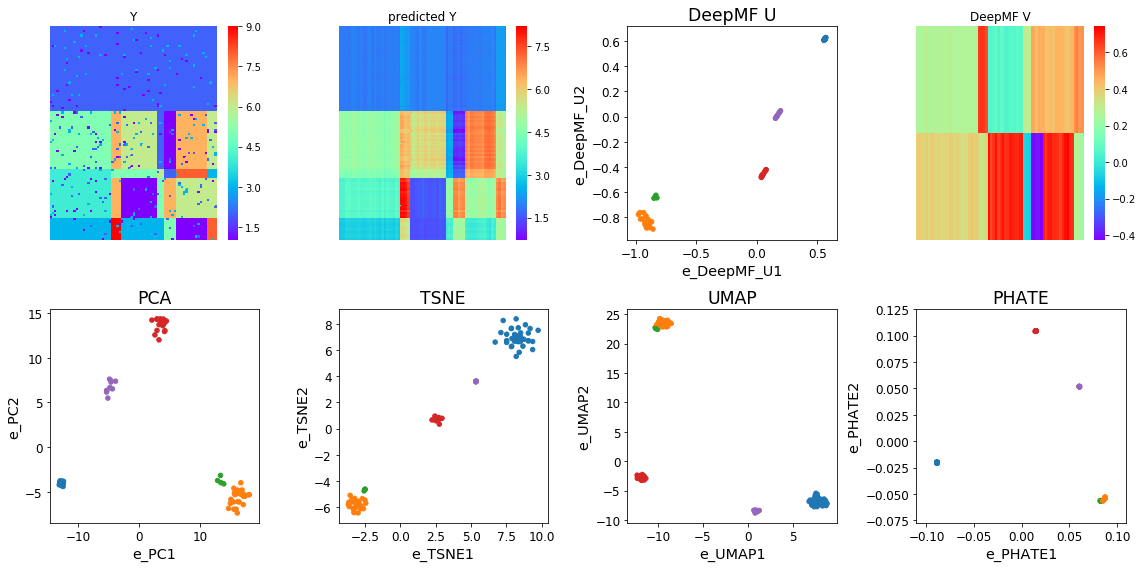

In [23]:
import run_deepmf
run_deepmf.plot_embedding(data, y_pred, U_df, V, meta_df, cluster_label, pca_df, tsne_df, umap_df, phate_df)